# Import Required Libraries
Import the necessary libraries, including NumPy and Matplotlib.

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define Time Series
Define two time series for which we want to compute the DTW distance. Use 
Matplotlib to visualize the two time series.

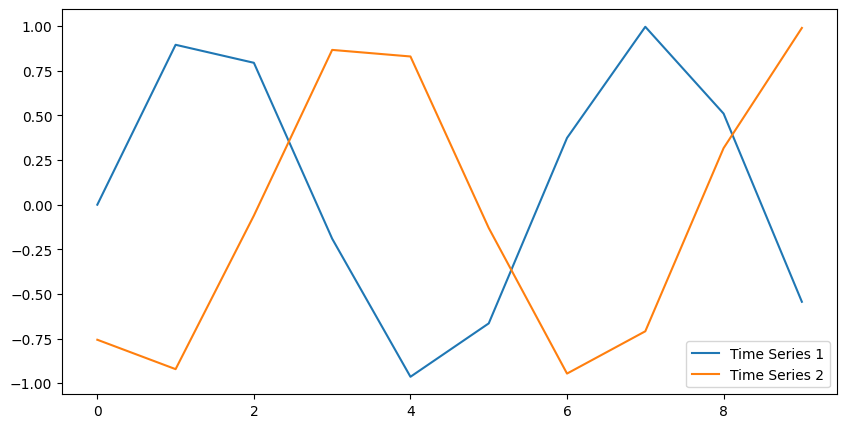

In [8]:
# Define Time Series (sinusoidal, one is a shifted version of the other)
time_series_1 = np.sin(np.linspace(0, 10, 10))
time_series_2 = np.sin(np.linspace(0, 10, 10) + 4)

def visualize_time_series(time_series_1, time_series_2):
    plt.figure(figsize=(10, 5))
    plt.plot(time_series_1, label='Time Series 1')
    plt.plot(time_series_2, label='Time Series 2')
    plt.legend()
    plt.show()

# Call the function with the defined time series
visualize_time_series(time_series_1, time_series_2)

# Define point-wise distance function
Define a function to compute the distance between two points in the time series.

In [9]:
# Define Distance Function
def euclidean_distance(point1, point2):
    """
    Function to compute the Euclidean distance between two points
    """
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

print(f'The point-wise Euclidean distance between the time series is \
      {euclidean_distance(time_series_1, time_series_2)}')


The point-wise Euclidean distance between the time series is       4.035568406966147


# Initialize DTW Matrix
Initialize a matrix to store the DTW distances.

In [10]:
# Initialize DTW Matrix
def initialize_dtw_matrix(time_series_1, time_series_2):
    """
    Function to initialize the DTW matrix with zeros and set the first row and column to infinity
    """
    # Create a matrix filled with zeros, with dimensions (len(time_series_1)+1)x(len(time_series_2)+1)
    dtw_matrix = np.zeros((len(time_series_1)+1, len(time_series_2)+1))
    
    # Set the first row and first column to be infinity
    dtw_matrix[0, 1:] = np.inf
    dtw_matrix[1:, 0] = np.inf
    
    return dtw_matrix

# Initialize the DTW matrix
dtw_matrix = initialize_dtw_matrix(time_series_1, time_series_2)

# Print the initialized DTW matrix
print(dtw_matrix)

[[ 0. inf inf inf inf inf inf inf inf inf inf]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


# Compute DTW Distance
Implement the DTW algorithm to compute the distance between the two time series.

In [11]:
# Compute DTW Distance
def compute_dtw_distance(time_series_1, time_series_2, dtw_matrix):
    """
    Function to compute the Dynamic Time Warping (DTW) distance between two time series
    """
    # Loop over each element in the time series
    for i in range(1, len(time_series_1)+1):
        for j in range(1, len(time_series_2)+1):
            # Compute the cost (Euclidean distance) between points
            cost = euclidean_distance(time_series_1[i-1], time_series_2[j-1])
            
            # Update the DTW matrix
            dtw_matrix[i, j] = cost + min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
    
    # Return the DTW distance
    return dtw_matrix[-1, -1]

# Compute the DTW distance
dtw_distance = compute_dtw_distance(time_series_1, time_series_2, dtw_matrix)

# Print the DTW distance
print(f"The DTW distance between the two time series is: {dtw_distance}")

The DTW distance between the two time series is: 4.004104797089829


# Visualize DTW Matrix and Optimal Path
Use Matplotlib to visualize the DTW matrix and the optimal path.

The optimal path in the DTW matrix is: [[0, 0], [1, 1], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7], [6, 8], [7, 9], [8, 10], [9, 10], [10, 10]]


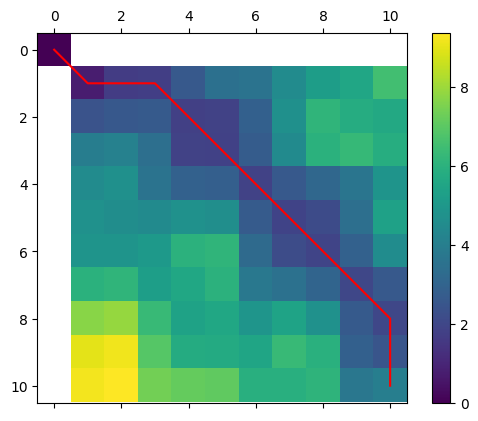

In [12]:
# Define a function to trace back the optimal path
def trace_back_path(dtw_matrix):
    """
    Function to trace back the optimal path in the DTW matrix
    """
    # Initialize the path with the end point
    path = [[len(dtw_matrix)-1, len(dtw_matrix[0])-1]]
    
    # Initialize i and j
    i = len(dtw_matrix) - 1
    j = len(dtw_matrix[0]) - 1
    
    # Loop until we reach the start point
    while i > 0 and j > 0:
        # Get the indices of the neighboring cells
        indices = [i-1, j-1, i-1, j, i, j-1]
        
        # Get the values of the neighboring cells
        values = [dtw_matrix[i-1][j-1], dtw_matrix[i-1][j], dtw_matrix[i][j-1]]
        
        # Get the index of the minimum value
        min_index = np.argmin(values)
        
        # Update i and j
        i = indices[2*min_index]
        j = indices[2*min_index+1]
        
        # Append the new point to the path
        path.append([i, j])
    
    # Reverse the path
    path = path[::-1]
    
    return path

# Trace back the optimal path
path = trace_back_path(dtw_matrix)

# Print the optimal path
print(f"The optimal path in the DTW matrix is: {path}")

# Visualize DTW Matrix and Optimal Path
def visualize_dtw_matrix_and_path(dtw_matrix, path):
    """
    Function to visualize the DTW matrix and the optimal path
    """
    # Create a figure and a set of subplots
    fig, ax = plt.subplots()
    
    # Create a heatmap of the DTW matrix
    cax = ax.matshow(dtw_matrix, interpolation='nearest', cmap='viridis')
    
    # Create a colorbar
    fig.colorbar(cax)
    
    # Plot the optimal path
    path = np.array(path)
    ax.plot(path[:, 1], path[:, 0], 'r')
    
    # Show the plot
    plt.show()

# Visualize the DTW matrix and the optimal path
visualize_dtw_matrix_and_path(dtw_matrix, path)